HINWEIS: Sport-Daten wurden aufgrund eines identifizierten Textfehlers (falsche Spielerzuordnung) ausgeschlossen

ANOVA-Tabelle (ohne Sport):
                       sum_sq     df         F    PR(>F)
C(Autor)             5.934669    1.0  3.971151  0.048958
C(Thema)            11.351852    2.0  3.798015  0.025649
C(Autor):C(Thema)    1.048561    2.0  0.350819  0.704957
Residual           152.433437  102.0       NaN       NaN


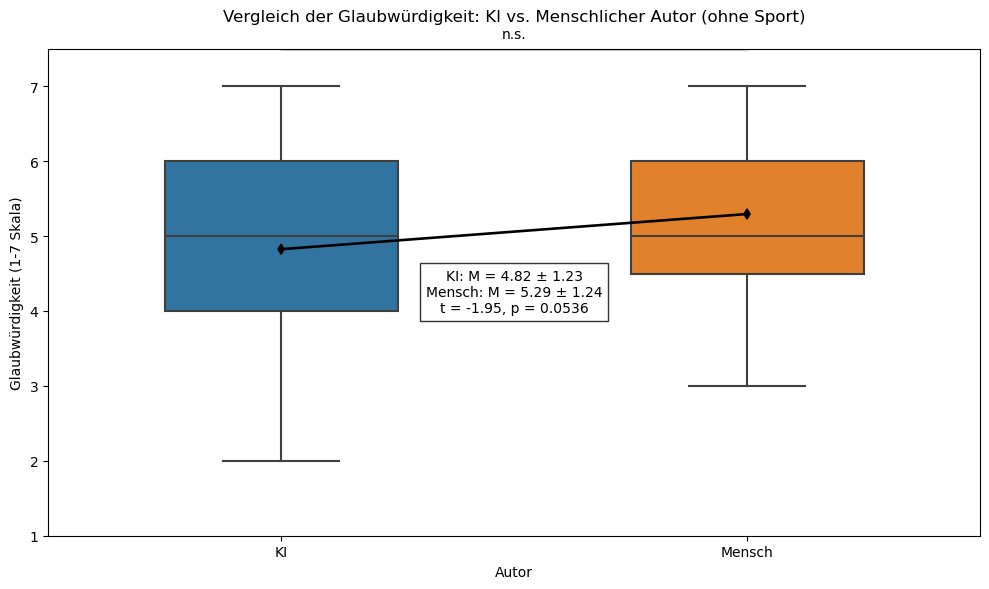


Themenspezifische Mittelwerte (ohne Sport):
                                                               mean       std
Autor  Thema                                                                 
KI     Geld - 2. Wie glaubwürdig fanden Sie den Text ?     4.947368  1.078769
       Gesundheit - 2. Wie glaubwürdig fanden Sie den ...  5.263158  1.240166
       Wissen - 2. Wie glaubwürdig fanden Sie den Text ?   4.263158  1.240166
Mensch Geld - 2. Wie glaubwürdig fanden Sie den Text ?     5.352941  1.320094
       Gesundheit - 2. Wie glaubwürdig fanden Sie den ...  5.529412  1.007326
       Wissen - 2. Wie glaubwürdig fanden Sie den Text ?   5.000000  1.414214


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

# 1. Daten laden und vorbereiten
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'
data = pd.concat([ai_data, human_data])

# 2. Daten für Glaubwürdigkeit (Frage 2) umwandeln - OHNE SPORT
melted_data = pd.melt(data, id_vars=['Autor'], 
                     value_vars=[
                         'Geld - 2. Wie glaubwürdig fanden Sie den Text ?',
                         'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?',
                         'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?'  # Sport bewusst ausgeschlossen
                     ],
                     var_name='Thema',
                     value_name='Glaubwürdigkeit')

# Dokumentation des Ausschlusses
print("HINWEIS: Sport-Daten wurden aufgrund eines identifizierten Textfehlers (falsche Spielerzuordnung) ausgeschlossen\n")

# 3. ANOVA durchführen (ohne Sport)
model = ols('Glaubwürdigkeit ~ C(Autor) + C(Thema) + C(Autor):C(Thema)', data=melted_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA-Tabelle (ohne Sport):")
print(anova_table)

# 4. Vergleichsdiagramm erstellen
plt.figure(figsize=(10, 6))

# Boxplot mit Signifikanzmarkierung
ax = sns.boxplot(x='Autor', y='Glaubwürdigkeit', data=melted_data, 
                 palette={'KI': '#1f77b4', 'Mensch': '#ff7f0e'},
                 width=0.5)

# Mittelwerte als Punkte einzeichnen
sns.pointplot(x='Autor', y='Glaubwürdigkeit', data=melted_data,
              color='black', markers='d', scale=0.7, 
              errorbar=None, estimator=np.mean)

# t-Test und Signifikanzmarkierung
ki_values = melted_data[melted_data['Autor'] == 'KI']['Glaubwürdigkeit']
human_values = melted_data[melted_data['Autor'] == 'Mensch']['Glaubwürdigkeit']
t_stat, p_val = stats.ttest_ind(ki_values, human_values, equal_var=False)  # Welch's t-Test

# Signifikanzsterne hinzufügen
y_max = melted_data['Glaubwürdigkeit'].max() + 0.5
if p_val < 0.001:
    sig_symbol = '***'
elif p_val < 0.01:
    sig_symbol = '**'
elif p_val < 0.05:
    sig_symbol = '*'
else:
    sig_symbol = 'n.s.'

plt.plot([0, 1], [y_max, y_max], color='black', lw=1)
plt.text(0.5, y_max+0.1, sig_symbol, ha='center', va='bottom', color='black')

# Diagramm beschriften
plt.title('Vergleich der Glaubwürdigkeit: KI vs. Menschlicher Autor (ohne Sport)', pad=20)
plt.xlabel('Autor')
plt.ylabel('Glaubwürdigkeit (1-7 Skala)')
plt.ylim(1, 7.5)

# Deskriptive Statistiken anzeigen
ki_mean = np.mean(ki_values)
human_mean = np.mean(human_values)
plt.text(0.5, 0.5, 
         f"KI: M = {ki_mean:.2f} ± {np.std(ki_values):.2f}\nMensch: M = {human_mean:.2f} ± {np.std(human_values):.2f}\nt = {t_stat:.2f}, p = {p_val:.4f}",
         ha='center', va='center', transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Zusätzliche Themen-spezifische Analyse (ohne Sport)
print("\nThemenspezifische Mittelwerte (ohne Sport):")
print(melted_data.groupby(['Autor', 'Thema'])['Glaubwürdigkeit'].agg(['mean', 'std']))


--- Ergebnisse für Frage 1 (Wie viel Vorwissen haben sie zu dem Thema des Textes?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.98, p = 0.3344 | KI: M = 3.47±1.96 | Mensch: M = 4.12±1.87
Gesundheit: t = 0.76, p = 0.4523 | KI: M = 3.32±1.52 | Mensch: M = 2.94±1.35
Wissen: t = -1.05, p = 0.3004 | KI: M = 2.68±1.62 | Mensch: M = 3.29±1.74

ANOVA-Ergebnisse:
KI-Autoren: F = 1.07, p = 0.3493
Mensch-Autoren: F = 2.09, p = 0.1347


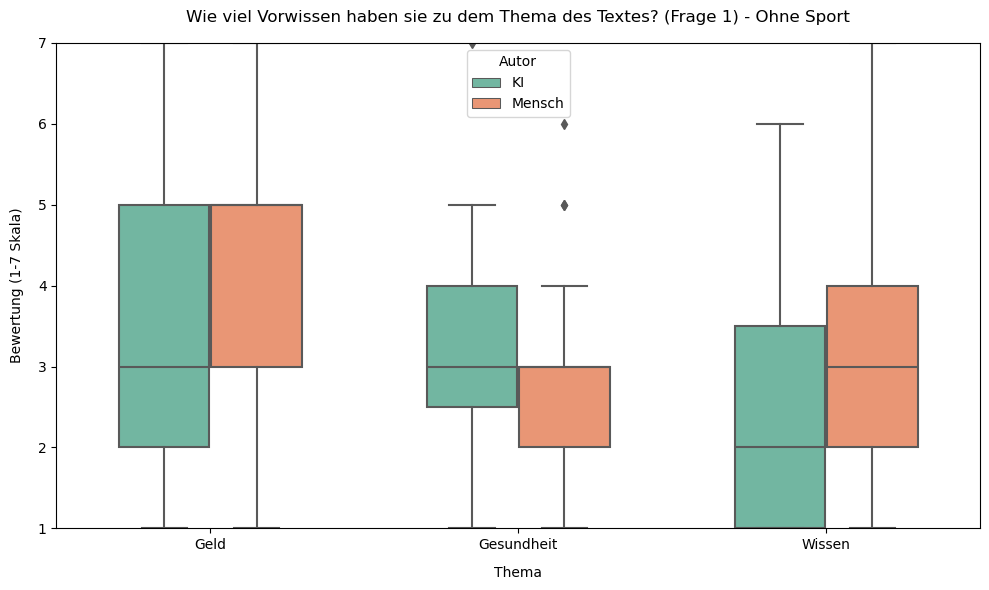


--- Ergebnisse für Frage 2 (Wie glaubwürdig fanden Sie den Text ?) ---
t-Tests (KI vs. Mensch):
Geld: t = -1.00, p = 0.3240 | KI: M = 4.95±1.05 | Mensch: M = 5.35±1.28
Gesundheit: t = -0.71, p = 0.4826 | KI: M = 5.26±1.21 | Mensch: M = 5.53±0.98
Wissen: t = -1.65, p = 0.1080 | KI: M = 4.26±1.21 | Mensch: M = 5.00±1.37

ANOVA-Ergebnisse:
KI-Autoren: F = 3.51, p = 0.0368
Mensch-Autoren: F = 0.78, p = 0.4646


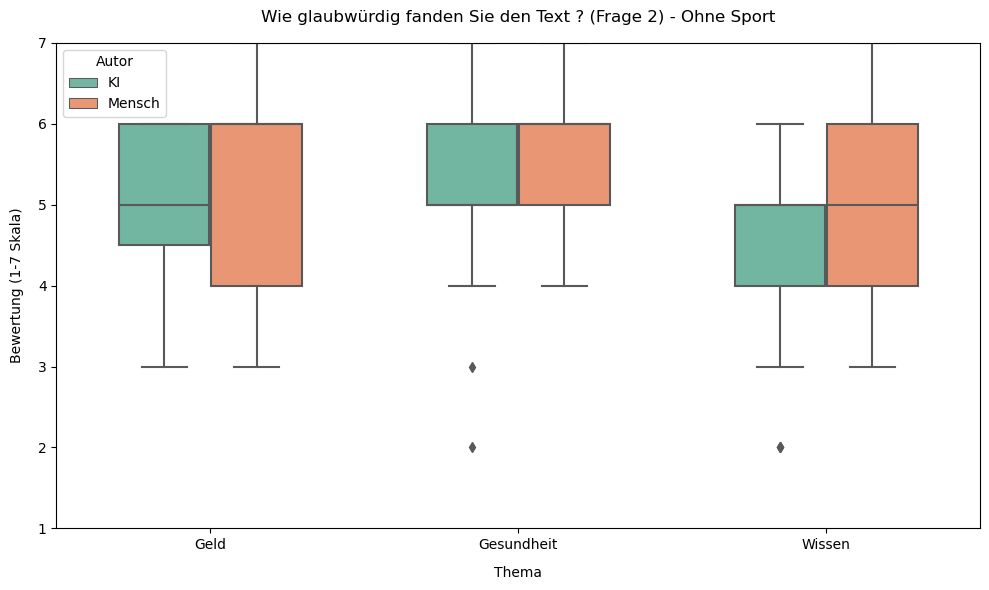


--- Ergebnisse für Frage 3 (Wie klar und verständlich war der Text?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.06, p = 0.9504 | KI: M = 4.79±1.20 | Mensch: M = 4.82±1.85
Gesundheit: t = -2.97, p = 0.0061 | KI: M = 5.53±1.19 | Mensch: M = 6.47±0.61
Wissen: t = -2.66, p = 0.0123 | KI: M = 4.63±0.93 | Mensch: M = 5.59±1.14

ANOVA-Ergebnisse:
KI-Autoren: F = 3.33, p = 0.0434
Mensch-Autoren: F = 6.38, p = 0.0035


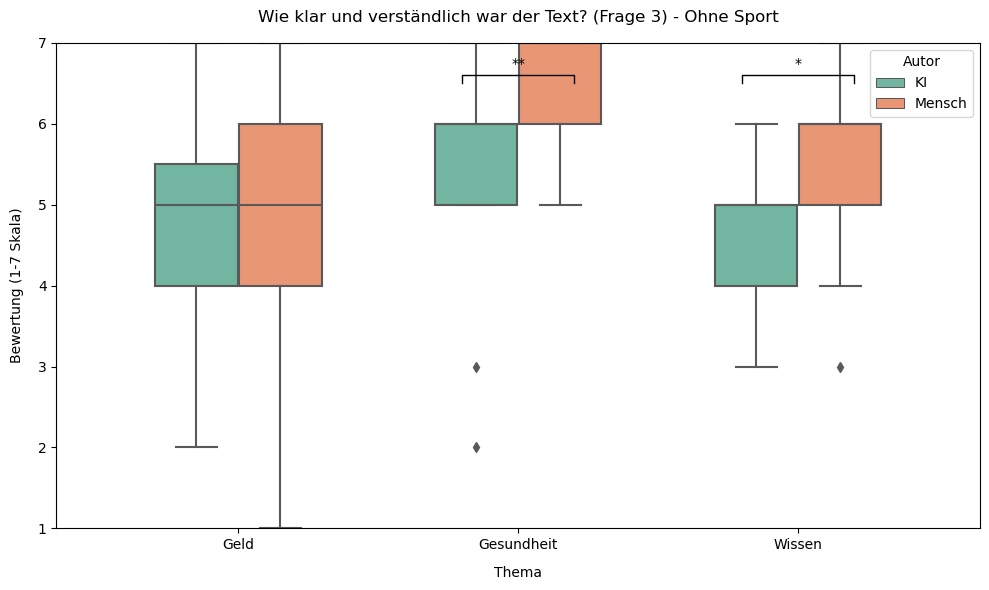


--- Ergebnisse für Frage 4 (Wie interessant fanden Sie den Text?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.15, p = 0.8794 | KI: M = 4.32±1.69 | Mensch: M = 4.41±1.94
Gesundheit: t = -0.34, p = 0.7376 | KI: M = 4.89±1.65 | Mensch: M = 5.06±1.16
Wissen: t = -0.49, p = 0.6309 | KI: M = 4.32±1.13 | Mensch: M = 4.59±1.97

ANOVA-Ergebnisse:
KI-Autoren: F = 0.88, p = 0.4199
Mensch-Autoren: F = 0.60, p = 0.5550


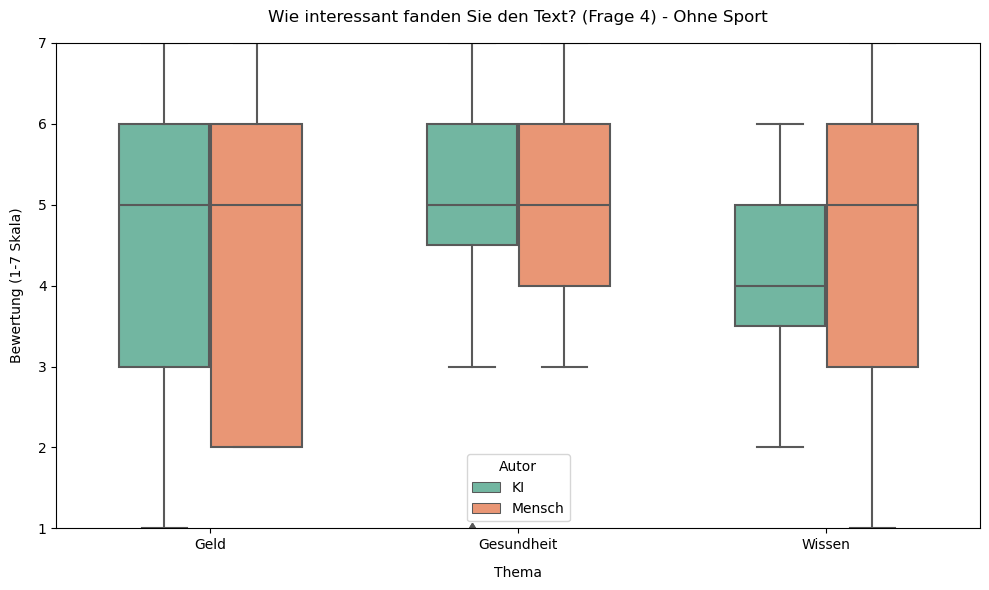


--- Ergebnisse für Frage 5 (Wie viel Vertrauen haben Sie in den Inhalt des Textes?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.67, p = 0.5103 | KI: M = 4.42±1.53 | Mensch: M = 4.76±1.48
Gesundheit: t = -1.32, p = 0.1969 | KI: M = 4.47±1.43 | Mensch: M = 5.06±1.16
Wissen: t = -2.16, p = 0.0383 | KI: M = 3.53±1.27 | Mensch: M = 4.53±1.42

ANOVA-Ergebnisse:
KI-Autoren: F = 2.55, p = 0.0875
Mensch-Autoren: F = 0.61, p = 0.5479


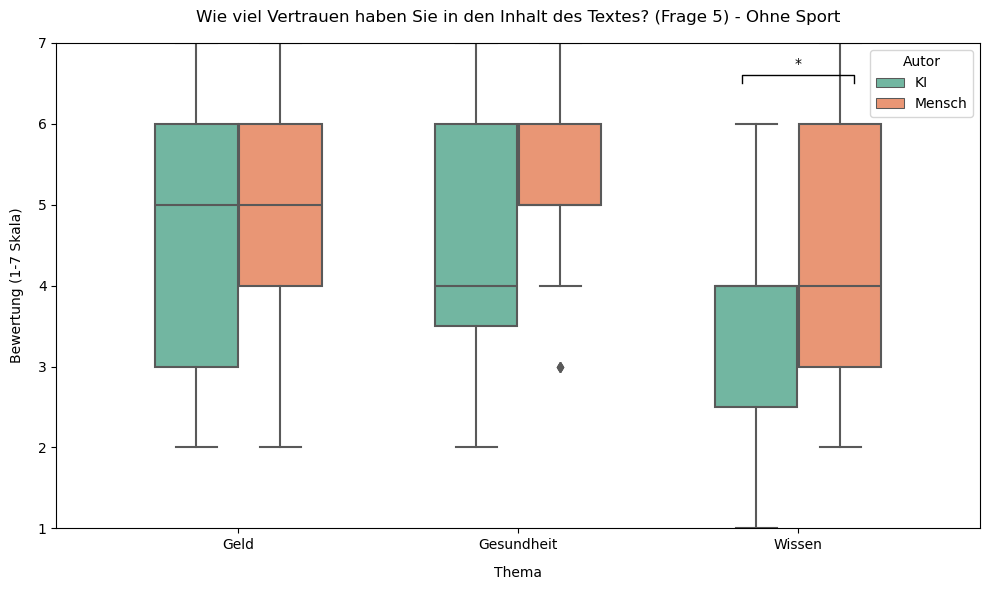


--- Ergebnisse für Frage 6 (Wie sachlich fanden sie den Text?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.80, p = 0.4293 | KI: M = 5.26±1.33 | Mensch: M = 5.59±1.03
Gesundheit: t = -0.89, p = 0.3780 | KI: M = 5.42±0.82 | Mensch: M = 5.71±1.02
Wissen: t = -0.97, p = 0.3395 | KI: M = 3.79±1.54 | Mensch: M = 4.35±1.81

ANOVA-Ergebnisse:
KI-Autoren: F = 9.08, p = 0.0004
Mensch-Autoren: F = 5.01, p = 0.0106


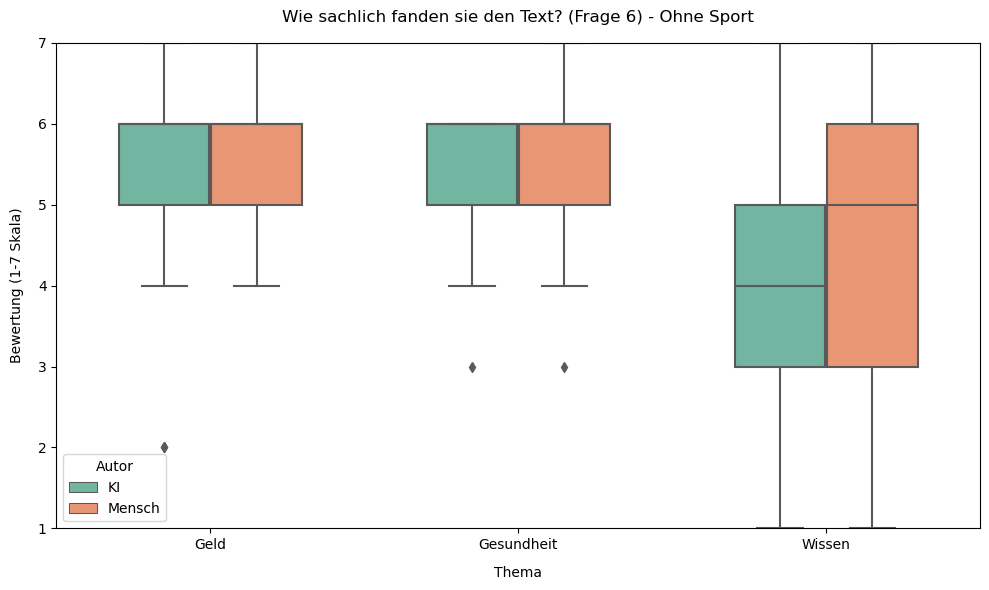


--- Ergebnisse für Frage 7 (Haben Sie den Eindruck, dass der Autor Fachkompetenz besitzt?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.87, p = 0.3901 | KI: M = 4.89±1.37 | Mensch: M = 5.24±0.88
Gesundheit: t = -0.87, p = 0.3915 | KI: M = 5.11±1.25 | Mensch: M = 5.41±0.77
Wissen: t = 0.08, p = 0.9368 | KI: M = 4.21±1.06 | Mensch: M = 4.18±1.38

ANOVA-Ergebnisse:
KI-Autoren: F = 2.59, p = 0.0844
Mensch-Autoren: F = 6.55, p = 0.0031


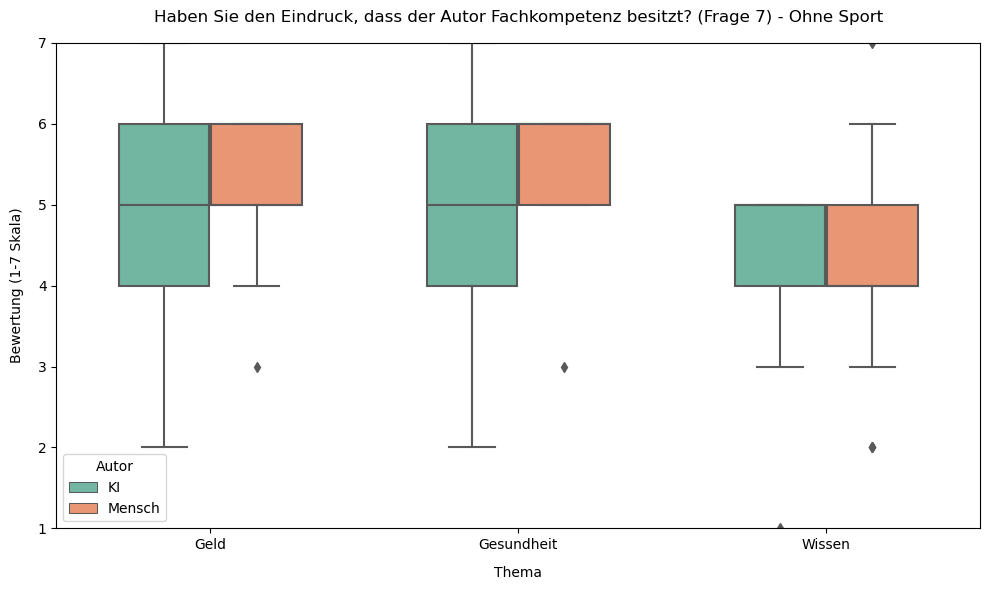


--- Ergebnisse für Frage 8 (Wie sehr vertrauen Sie den im Text präsentierten Informationen?) ---
t-Tests (KI vs. Mensch):
Geld: t = -1.37, p = 0.1809 | KI: M = 4.37±1.46 | Mensch: M = 5.00±1.24
Gesundheit: t = -2.31, p = 0.0277 | KI: M = 4.37±1.53 | Mensch: M = 5.35±0.90
Wissen: t = -1.59, p = 0.1211 | KI: M = 3.37±1.49 | Mensch: M = 4.18±1.46

ANOVA-Ergebnisse:
KI-Autoren: F = 2.69, p = 0.0772
Mensch-Autoren: F = 3.90, p = 0.0271


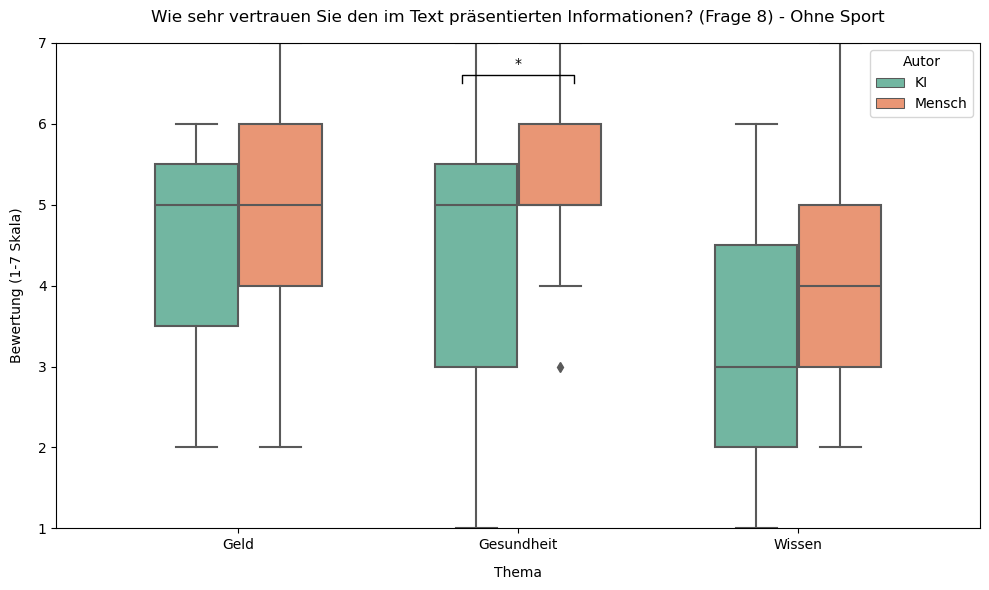


--- Ergebnisse für Frage 9 (Wie wahrscheinlich ist es, dass der Text missverstanden werden könnte?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.14, p = 0.8911 | KI: M = 3.05±1.28 | Mensch: M = 3.12±1.45
Gesundheit: t = 1.16, p = 0.2521 | KI: M = 2.74±1.02 | Mensch: M = 2.35±0.90
Wissen: t = 0.53, p = 0.6014 | KI: M = 3.37±1.49 | Mensch: M = 3.12±1.28

ANOVA-Ergebnisse:
KI-Autoren: F = 1.10, p = 0.3404
Mensch-Autoren: F = 2.05, p = 0.1393


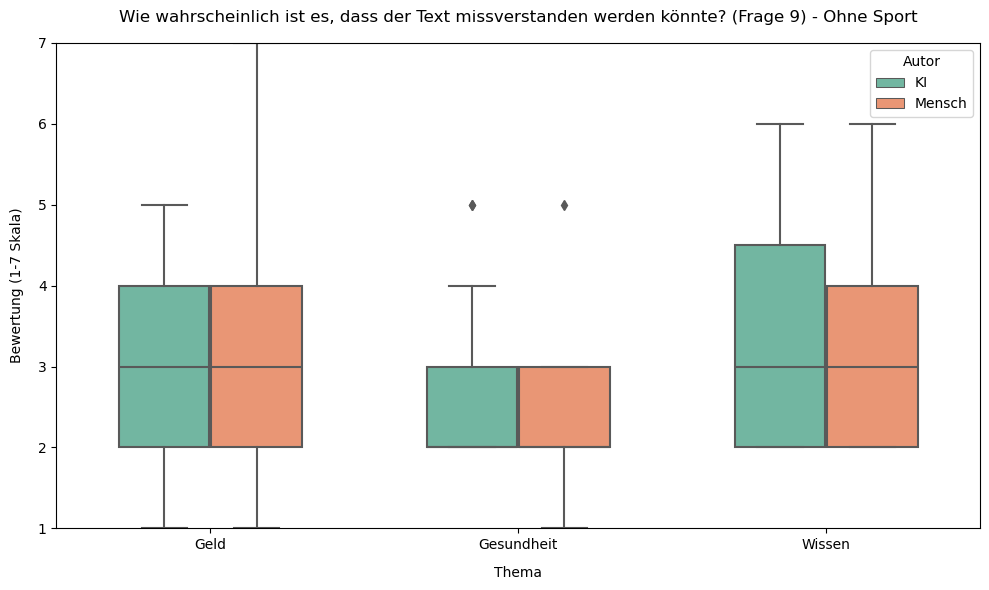


HINWEIS: Sport-Daten wurden in allen Analysen aufgrund eines identifizierten Textfehlers (falsche Spielerzuordnung) ausgeschlossen


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Daten laden und vorbereiten
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'
data = pd.concat([ai_data, human_data])

# Fragenkatalog (ohne Frage 2, da bereits analysiert)
questions = {
    1: "Wie viel Vorwissen haben sie zu dem Thema des Textes?",
    2: "Wie glaubwürdig fanden Sie den Text ?",
    3: "Wie klar und verständlich war der Text?",
    4: "Wie interessant fanden Sie den Text?",
    5: "Wie viel Vertrauen haben Sie in den Inhalt des Textes?",
    6: "Wie sachlich fanden sie den Text?",
    7: "Haben Sie den Eindruck, dass der Autor Fachkompetenz besitzt?",
    8: "Wie sehr vertrauen Sie den im Text präsentierten Informationen?",
    9: "Wie wahrscheinlich ist es, dass der Text missverstanden werden könnte?"
}

# Analysefunktion (ohne Sport)
def analyze_question(question_num, question_text):
    # Daten extrahieren (Sport explizit ausschließen)
    melted_data = pd.melt(data, id_vars=['Autor'], 
                        value_vars=[
                            f'Geld - {question_num}. {question_text}',
                            f'Gesundheit - {question_num}. {question_text}',
                            f'Wissen - {question_num}. {question_text}'  # Kein Sport
                        ],
                        var_name='Frage', 
                        value_name='Bewertung')
    
    # Thema extrahieren
    melted_data['Thema'] = melted_data['Frage'].str.extract(r'(Geld|Gesundheit|Wissen)')
    
    # Boxplot erstellen
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Thema', y='Bewertung', hue='Autor', 
               data=melted_data, palette='Set2', width=0.6,
               order=['Geld', 'Gesundheit', 'Wissen'])
    plt.title(f'{question_text} (Frage {question_num}) - Ohne Sport', pad=15)
    plt.xlabel('Thema', labelpad=10)
    plt.ylabel('Bewertung (1-7 Skala)', labelpad=10)
    plt.ylim(1, 7)
    plt.legend(title='Autor')
    
    # Signifikanzmarkierung
    def annotate_significance(x1, x2, y, p):
        if p < 0.001:
            symbol = '***'
        elif p < 0.01:
            symbol = '**'
        elif p < 0.05:
            symbol = '*'
        else:
            return
        plt.plot([x1, x1, x2, x2], [y, y+0.1, y+0.1, y], lw=1, color='black')
        plt.text((x1+x2)*0.5, y+0.15, symbol, ha='center', va='bottom', color='black')
    
    # t-Tests pro Thema (KI vs. Mensch)
    y_pos = 6.5
    themen = ['Geld', 'Gesundheit', 'Wissen']
    print(f"\n--- Ergebnisse für Frage {question_num} ({question_text}) ---")
    print("t-Tests (KI vs. Mensch):")
    for i, thema in enumerate(themen):
        ki = melted_data[(melted_data['Autor'] == 'KI') & 
                        (melted_data['Thema'] == thema)]['Bewertung']
        mensch = melted_data[(melted_data['Autor'] == 'Mensch') & 
                            (melted_data['Thema'] == thema)]['Bewertung']
        
        # Welch's t-Test (ungleiche Varianzen annehmen)
        t_stat, p_val = stats.ttest_ind(ki, mensch, nan_policy='omit', equal_var=False)
        print(f"{thema}: t = {t_stat:.2f}, p = {p_val:.4f} | KI: M = {np.mean(ki):.2f}±{np.std(ki):.2f} | Mensch: M = {np.mean(mensch):.2f}±{np.std(mensch):.2f}")
        annotate_significance(i-0.2, i+0.2, y_pos, p_val)
    
    # ANOVA für Themenunterschiede (getrennt nach Autor)
    print("\nANOVA-Ergebnisse:")
    for autor in ['KI', 'Mensch']:
        autor_data = melted_data[melted_data['Autor'] == autor]
        groups = [autor_data[autor_data['Thema'] == t]['Bewertung'] for t in themen]
        f_stat, p_val = stats.f_oneway(*groups)
        print(f"{autor}-Autoren: F = {f_stat:.2f}, p = {p_val:.4f}")
    
    plt.tight_layout()
    plt.show()

# Alle Fragen analysieren
for q_num, q_text in questions.items():
    analyze_question(q_num, q_text)

print("\nHINWEIS: Sport-Daten wurden in allen Analysen aufgrund eines identifizierten Textfehlers (falsche Spielerzuordnung) ausgeschlossen")